In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import shutil
import PIL

In [3]:
# Read in an image from path and converting it to grayscale
def makeGray(path):
    img = cv2.imread(path)
    # img = cv2.resize(img,(128,128))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,gray = cv2.threshold(gray,140,250,0)
    # plt.imshow(gray)

    return img, gray

In [4]:
# This function will create a circular mask given the image's heigh and width
# this is mainly to ignore the outer walls of the brain and try to read the inner
# portions
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [29]:
# Finally, we'll draw a contour over the whitest region of the brain
def drawCountr(img):
    contours, hier = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if 50<cv2.contourArea(cnt)<5000:
                    cv2.drawContours(img,[cnt],0,(255,0,0),1)

In [6]:
# load in the predicted raw images
predicted = os.listdir(path='../predicted/raw/')

In [7]:
# Creating the new folder where we'll save the images which will
# have a hightlighted region
if os.path.isdir('../predicted/drawn/'):
    shutil.rmtree('../predicted/drawn/')

os.mkdir('../predicted/drawn/')

Created file @ "../predicted/drawn/final0.jpg"
Created file @ "../predicted/drawn/final1.jpg"
Created file @ "../predicted/drawn/final2.jpg"
Created file @ "../predicted/drawn/final3.jpg"
Created file @ "../predicted/drawn/final4.jpg"
Created file @ "../predicted/drawn/final5.jpg"
Created file @ "../predicted/drawn/final6.jpg"
Created file @ "../predicted/drawn/final7.jpg"
Created file @ "../predicted/drawn/final8.jpg"
Created file @ "../predicted/drawn/final9.jpg"
Created file @ "../predicted/drawn/final10.jpg"
Created file @ "../predicted/drawn/final11.jpg"
Created file @ "../predicted/drawn/final12.jpg"
Created file @ "../predicted/drawn/final13.jpg"


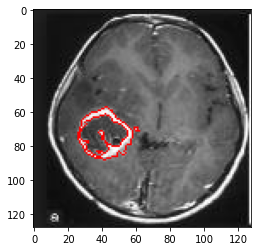

In [33]:
# Let's now iterate thrhough all images and apply all functions
for count, i in enumerate(predicted):
    img, gray = makeGray('../predicted/raw/' + i)

    h, w = img.shape[:2]
    circle = create_circular_mask(h, w, radius=50)
    gray = gray.copy()
    gray[~circle] = 0

    drawCountr(img)

    # plt.imshow(img)
    plt.imsave('../predicted/drawn/final{}.jpg'.format(count), img)
    print('Created file @ "../predicted/drawn/final{}.jpg"'.format(count))

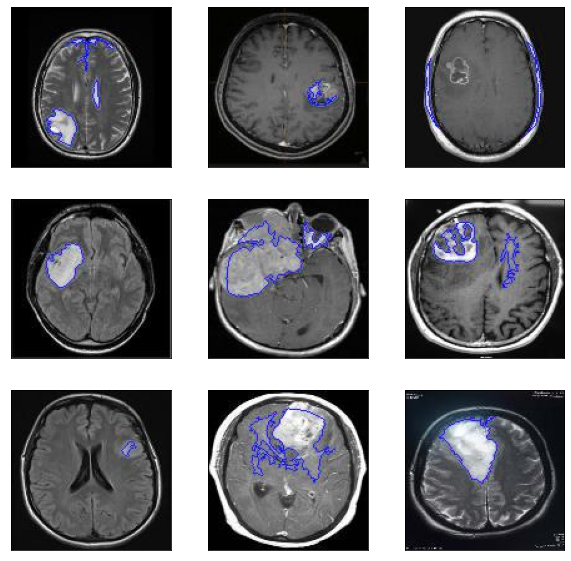

In [32]:
predLen = len(predicted)
drawn = os.listdir(path='../predicted/drawn/')
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    img = cv2.imread('../predicted/drawn/final{}.jpg'.format(i))
    plt.imshow(img, cmap=plt.cm.binary)